Se carga el dataset que se utilizara

In [1]:
from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('windserie.csv', header=None))
print(dataset.head)

<bound method NDFrame.head of          0
0      6.0
1      7.1
2     10.0
3      6.9
4      8.4
5      8.9
6      6.7
7      7.6
8      3.9
9      4.9
10     3.6
11     3.4
12     2.7
13     2.2
14     3.0
15     2.6
16     3.0
17     2.7
18     4.0
19     3.8
20     3.9
21     5.8
22     7.2
23     6.8
24     5.9
25     6.4
26     6.7
27     7.6
28     6.9
29     4.8
...    ...
4212   3.4
4213   4.2
4214   4.8
4215   2.3
4216   3.0
4217   2.7
4218   3.0
4219   2.6
4220   2.5
4221   3.3
4222   7.7
4223   9.7
4224  12.7
4225  13.2
4226  12.7
4227  15.8
4228  13.6
4229   9.1
4230   5.3
4231   2.8
4232   5.0
4233   4.5
4234   3.3
4235   3.4
4236   3.4
4237   2.8
4238   2.5
4239   2.4
4240   2.9
4241   2.8

[4242 rows x 1 columns]>


Se aplica media movil en los datos.

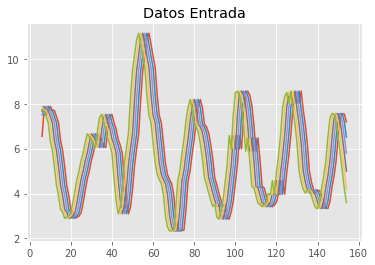

<Figure size 2560x1920 with 0 Axes>

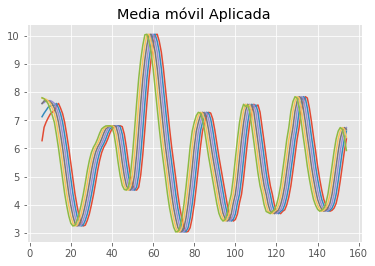

<Figure size 2560x1920 with 0 Axes>

In [4]:
from matplotlib import pyplot

pyplot.style.use("ggplot")
pyplot.plot(dataset[1:150])
pyplot.title('Datos Entrada')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

dataset=dataset.rolling(window=8, min_periods=1).mean()

pyplot.plot(dataset[1:150])
pyplot.title('Media móvil Aplicada')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

Se define el tamaño de ventana que tendra la serie de tiempos, y se transforma a una colección de datos para el entrenamiento supervisado del modelo.

In [5]:
import Tools as tls

size = 5

dataset = tls.series_to_supervised(dataset,size, n_out=1, dropnan = True)
print(dataset)

      var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var5(t-5)  var6(t-5)  \
10     6.000000   6.550000   7.700000   7.500000   7.680000   7.883333   
11     6.275000   7.125000   7.600000   7.590000   7.781667   7.798810   
12     6.750000   7.250000   7.626667   7.687778   7.759206   7.765873   
13     6.937500   7.357500   7.690833   7.694405   7.744405   7.683780   
14     7.086000   7.462667   7.695524   7.695524   7.683024   7.579524   
15     7.218889   7.504603   7.696270   7.652520   7.596270   7.376687   
16     7.289660   7.532517   7.659303   7.582517   7.420017   7.169303   
17     7.340952   7.520640   7.597202   7.430015   7.233140   6.924702   
18     7.520640   7.597202   7.430015   7.233140   6.924702   6.486161   
19     7.597202   7.430015   7.233140   6.924702   6.486161   6.010937   
20     7.430015   7.233140   6.924702   6.486161   6.010937   5.459375   
21     7.233140   6.924702   6.486161   6.010937   5.459375   4.926562   
22     6.924702   6.486161   6.010937 

Se normalizan los datos entre 0 y 1

In [6]:
from sklearn import preprocessing

datasetnorm = preprocessing.minmax_scale(dataset, feature_range=(0, 1))
print(datasetnorm)
datasetnorm = DataFrame(datasetnorm)
print(datasetnorm.head)

[[0.37505232 0.40452072 0.46613646 ... 0.46359252 0.46057871 0.44881368]
 [0.38978652 0.43532859 0.46077857 ... 0.45984185 0.45113528 0.43770228]
 [0.4152365  0.44202595 0.46220734 ... 0.45167095 0.44112261 0.42459686]
 ...
 [0.46019255 0.51460862 0.55705316 ... 0.46990373 0.41598995 0.36751779]
 [0.51460862 0.55705316 0.58493093 ... 0.41598995 0.36751779 0.32373378]
 [0.55705316 0.58493093 0.59673504 ... 0.36751779 0.32373378 0.28580996]]
<bound method NDFrame.head of             0         1         2         3         4         5         6   \
0     0.375052  0.404521  0.466136  0.455421  0.465065  0.475959  0.389787   
1     0.389787  0.435329  0.460779  0.460243  0.470512  0.471431  0.415237   
2     0.415237  0.442026  0.462207  0.465482  0.469309  0.469666  0.425283   
3     0.425283  0.447786  0.465645  0.465837  0.468516  0.465267  0.433239   
4     0.433239  0.453420  0.465897  0.465897  0.465227  0.459681  0.440359   
5     0.440359  0.455667  0.465937  0.463593  0.460579  0.

Preparamos los datos para alimentar la red para entrenamiento y prueba.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values
X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)
print (X_train.shape, y_train.shape)

(2962, 35) (2962, 1)


Se define nuestro modelo, con un numero de "vecinos" deseados a utilizarse, y se entrena

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=88)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=88, p=2,
          weights='uniform')

Realizamos predicción de valores de prueba, y comparamos con valores reales utilizando el error cuadratico medio.

In [22]:
from sklearn.metrics import mean_squared_error

pred = knn.predict(X_test)
MSE = mean_squared_error(y_test, pred)

print ('MSE '+ str(MSE))

MSE 0.001970117414609437


Se imprime grafica

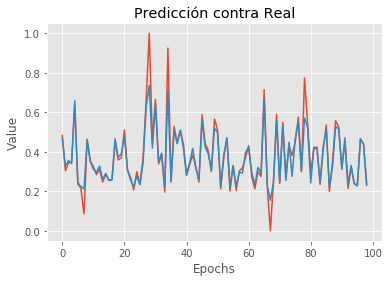

<Figure size 2560x1920 with 0 Axes>

In [23]:
pyplot.style.use("ggplot")
pyplot.plot(y_test[1:100,]) #Valores ajustables para grafica
pyplot.plot(pred[1:100,])
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.title('Predicción contra Real')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

En este paso, realizaremos entrenamiento con multiples valores de vecinos, para buscar un parametro de vecinos que nos de resultado con mejor aptitud.

In [ ]:
neighbors = 350
MSEList = []
for k in range(1,neighbors):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    MSEList.append(mean_squared_error(y_test, knn.predict(X_test)))
    
pyplot.plot(range(1,neighbors), MSEList)
pyplot.xlabel('k-neighbors')
pyplot.ylabel('Mean Squared Error')
pyplot.title('Gráfica parametro k-Vecinos')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()